# Punjab Crime Statistics

### Importing Packages

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set()
%matplotlib inline


#Linear Regression pakaage
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


### Loading data

In [3]:
df=pd.read_csv('punjab-crime-statistics.csv',sep='\t')

In [4]:
df.head()

,Year,Province,Division,District,Crime Type,Crime No,Population,Normalised/100000
0,2002,Punjab,Bahawalpur,Bahawalpur,All Reported,8440,2743000.0,307.692308
1,2002,Punjab,Bahawalpur,Bahawalpur,Murder,105,2743000.0,3.827926
2,2002,Punjab,Bahawalpur,Bahawalpur,Attempted Murder,226,2743000.0,8.239154
3,2002,Punjab,Bahawalpur,Bahawalpur,Hurt,700,2743000.0,25.519504
4,2002,Punjab,Bahawalpur,Bahawalpur,Rioting,12,2743000.0,0.437477


### Checking Missing Values

In [5]:
df.isnull().sum()

Year                 0
Province             0
Division             0
District             0
Crime Type           0
Crime No             0
Population           0
Normalised/100000    0
dtype: int64

### Dataset Dimensions

In [6]:
df.shape

(6885, 8)

### Checking Datatypes

In [7]:
df.dtypes

Year                   int64
Province              object
Division              object
District              object
Crime Type            object
Crime No               int64
Population           float64
Normalised/100000    float64
dtype: object

# Exploratory data analysis

### All reported Crimes in Punjab year wise

In [8]:
all_reported=df[df['Crime Type']=='All Reported']

In [9]:
all_reported_yearwise=all_reported.groupby('Year')['Crime No'].sum().to_frame().reset_index()

In [10]:
all_reported_yearwise

,Year,Crime No
0,2002,247858
1,2004,267519
2,2005,276411
3,2006,342561
4,2007,344925
5,2008,385616
6,2009,385616
7,2010,386437
8,2011,393196
9,2012,395006


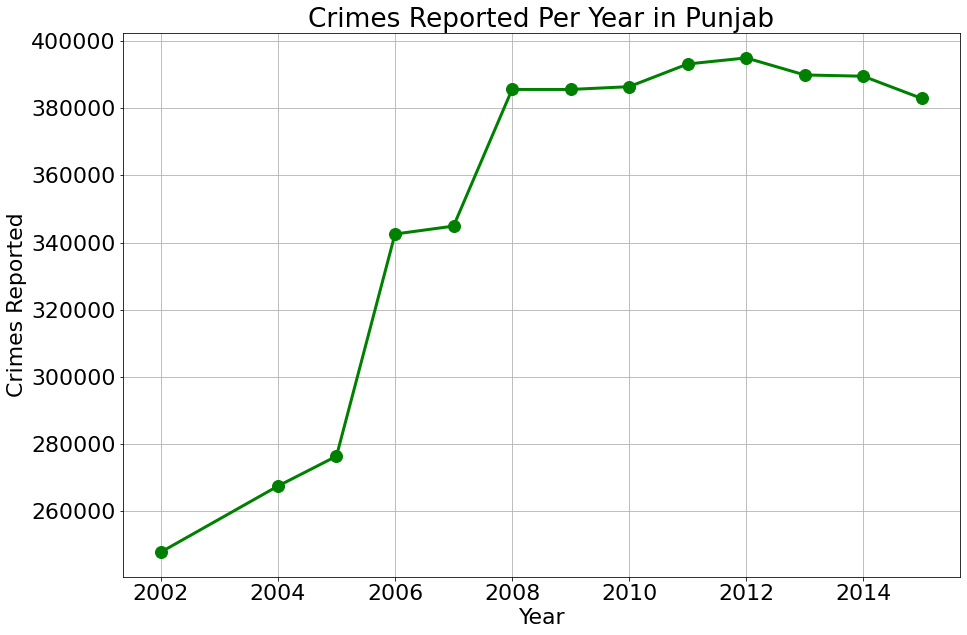

In [11]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15,10))
plt.plot(all_reported_yearwise['Year'], all_reported_yearwise['Crime No'], color='g',marker='o',linewidth=3.0,markersize=12)
plt.xlabel('Year')
plt.ylabel('Crimes Reported')
plt.title('Crimes Reported Per Year in Punjab')
plt.grid()
plt.show()

### Bar Plot

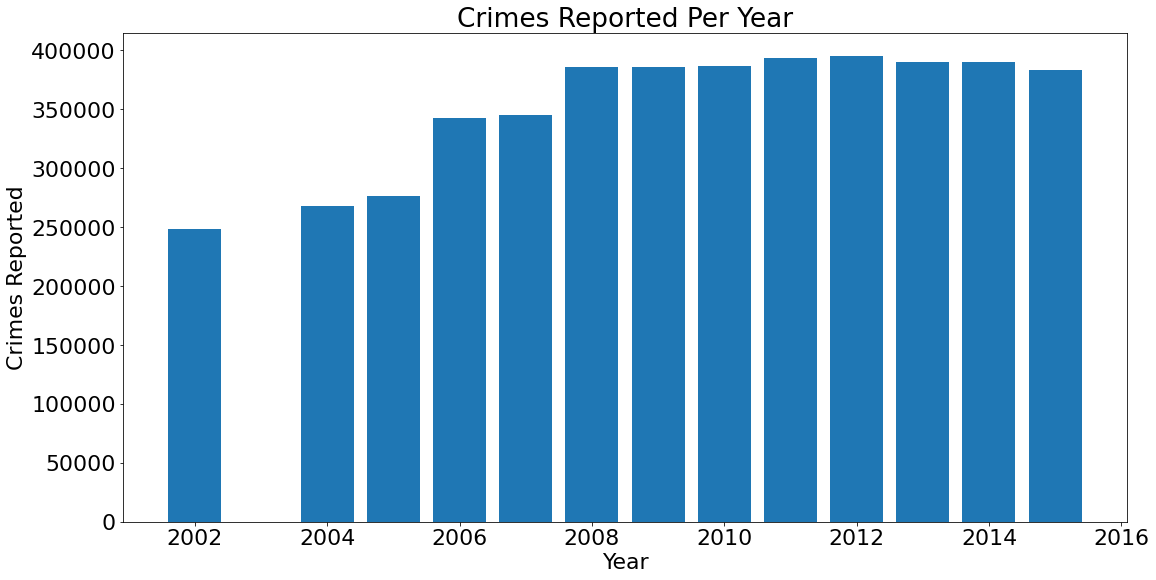

In [12]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(18,9))
plt.bar(all_reported_yearwise['Year'], all_reported_yearwise['Crime No'])
plt.xlabel('Year')
plt.ylabel('Crimes Reported')
plt.title('Crimes Reported Per Year')
plt.show()

### Grouped Bar chart Devision Wise

In [13]:
df['Division'].nunique()

9

### Line plot Division Wise

In [14]:
Division=list(all_reported['Division'].unique())
Division.remove('Sahiwal')

In [15]:
all_reported_divisionwise=all_reported[all_reported['Division']=='Bahawalpur']
all_reported_yearwise_division=all_reported_divisionwise.groupby('Year')['Crime No'].sum().to_frame().reset_index()
all_reported_yearwise_division

,Year,Crime No
0,2002,24200
1,2004,18026
2,2005,21681
3,2006,31994
4,2007,30490
5,2008,37709
6,2009,37709
7,2010,34017
8,2011,38040
9,2012,37470


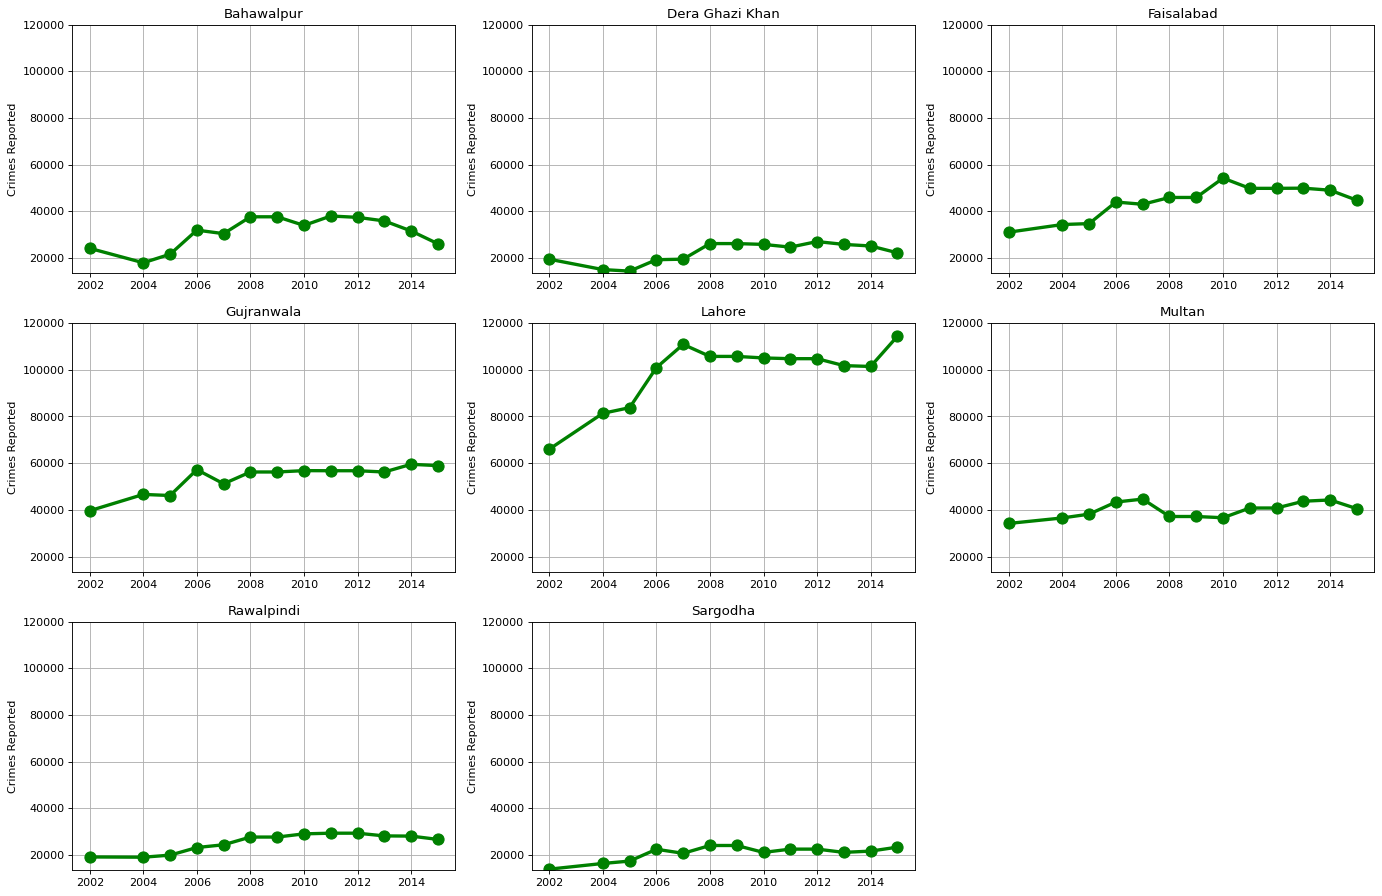

In [20]:
fig, axs = plt.subplots(3, 3,figsize=(21, 14), dpi=80)
count=0

plt.rcParams.update({'font.size': 10})
for row in range(3):
    for col in range(3):
        if(count==8):
            break;
            
        all_reported_divisionwise=all_reported[all_reported['Division']==Division[count]]
        all_reported_yearwise_division=all_reported_divisionwise.groupby('Year')['Crime No'].sum().to_frame().reset_index()
        #plt.rcParams.update({'font.size': 10})
        #axs[row, col].figure(figsize=(7,4))
        axs[row, col].plot(all_reported_yearwise_division['Year'], all_reported_yearwise_division['Crime No'], color='g',marker='o',linewidth=3.0,markersize=10)
        #axs[row, col].set_xlabel('Year')
        axs[row, col].set_ylabel('Crimes Reported')
        axs[row, col].set_title(Division[count])
        axs[row, col].grid()
        axs[row, col].set_ylim([13500, 120000])
        count=count+1
        
axs.flat[-1].set_visible(False)
plt.show()

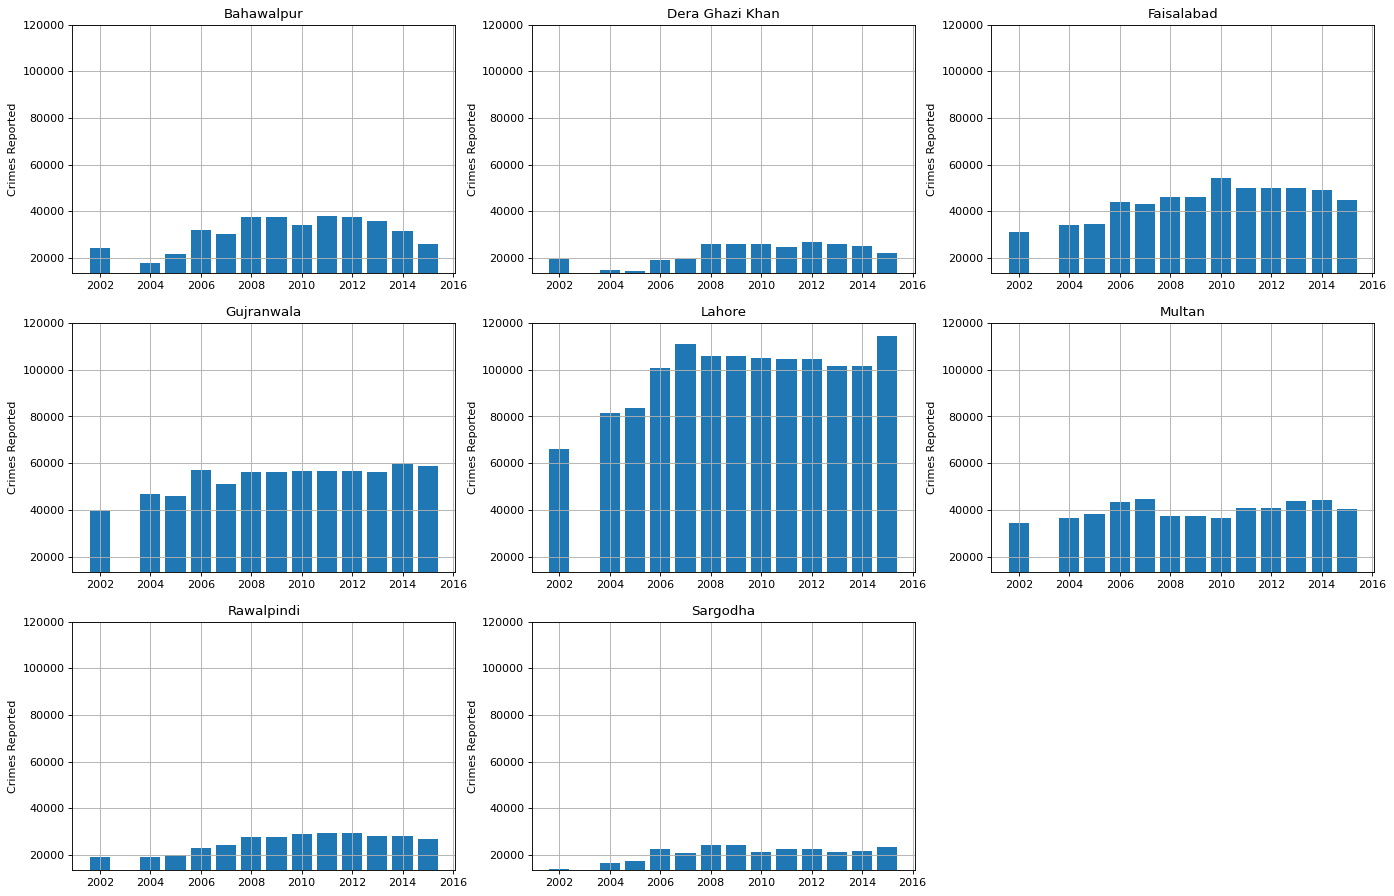

In [17]:
fig, axs = plt.subplots(3, 3,figsize=(21, 14), dpi=80)
count=0


for row in range(3):
    for col in range(3):
        if(count==8):
            break;
            
        all_reported_divisionwise=all_reported[all_reported['Division']==Division[count]]
        all_reported_yearwise_division=all_reported_divisionwise.groupby('Year')['Crime No'].sum().to_frame().reset_index()
        plt.rcParams.update({'font.size': 10})
        axs[row, col].grid()
        axs[row, col].bar(all_reported_yearwise_division['Year'], all_reported_yearwise_division['Crime No'])
        #axs[row, col].set_xlabel('Year')
        axs[row, col].set_ylabel('Crimes Reported')
        axs[row, col].set_title(Division[count])
        axs[row, col].set_ylim([13500, 120000])
        count=count+1
        
axs.flat[-1].set_visible(False)
plt.show()

## Regression Analysis

#### Linear Regression

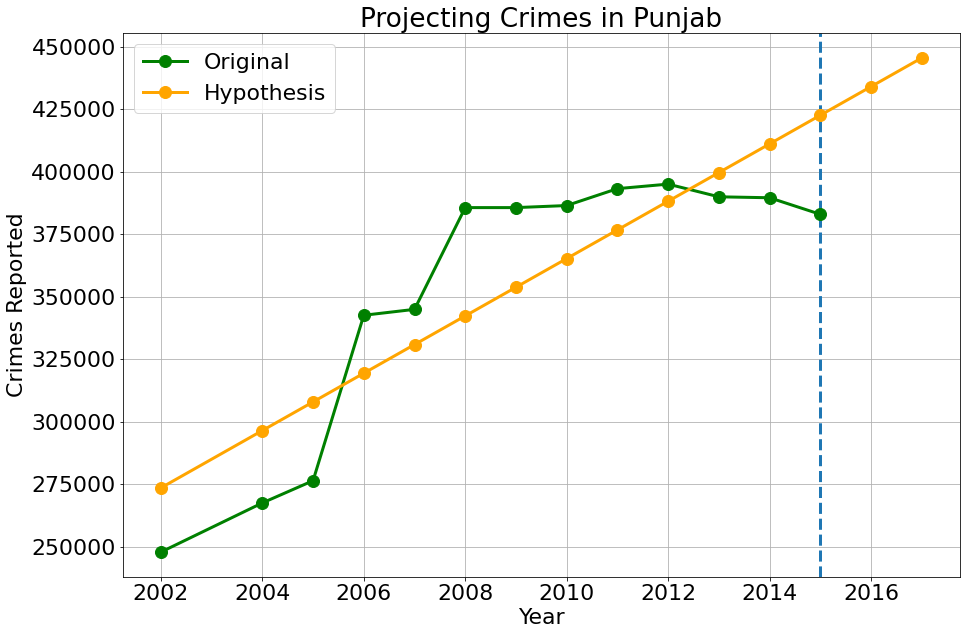

In [17]:
#seperating dependent and independent column
X = all_reported_yearwise.drop(['Crime No'], axis=1)
Y = all_reported_yearwise[['Crime No']]

#applying Linear Regression
la_model = LinearRegression()
la_model.fit(X, Y)

year=list(all_reported_yearwise['Year'])
year.append(2016)
year.append(2017)
ypred=la_model.predict(pd.DataFrame(year))


plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15,10))
plt.axvline(2015,linewidth = '3',linestyle = 'dashed')
plt.plot(all_reported_yearwise['Year'], all_reported_yearwise['Crime No'],label='Original', color='g',marker='o',linewidth=3.0,markersize=12)
plt.plot(year, ypred , color='orange',label='Hypothesis',marker='o',linewidth=3.0,markersize=12)
plt.xlabel('Year')
plt.ylabel('Crimes Reported')
plt.title('Projecting Crimes in Punjab')
plt.legend()
plt.grid()
plt.show()

#### Polynomial Regression Degree=2

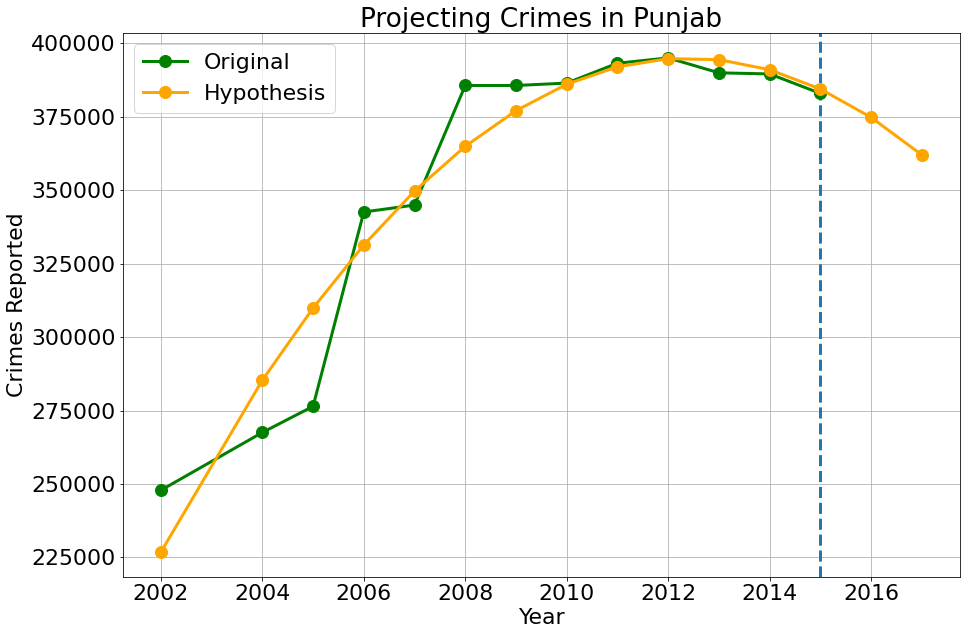

In [18]:
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,Y)

year=list(all_reported_yearwise['Year'])
year.append(2016)
year.append(2017)
ypred=polyreg.predict(pd.DataFrame(year))

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15,10))
plt.axvline(2015,linewidth = '3',linestyle = 'dashed')
plt.plot(all_reported_yearwise['Year'], all_reported_yearwise['Crime No'],label='Original', color='g',marker='o',linewidth=3.0,markersize=12)
plt.plot(year, ypred ,label='Hypothesis', color='orange',marker='o',linewidth=3.0,markersize=12)
plt.xlabel('Year')
plt.ylabel('Crimes Reported')
plt.title('Projecting Crimes in Punjab')
plt.legend()
plt.grid()
plt.show()

#### Polynomial Regression Degree= 3

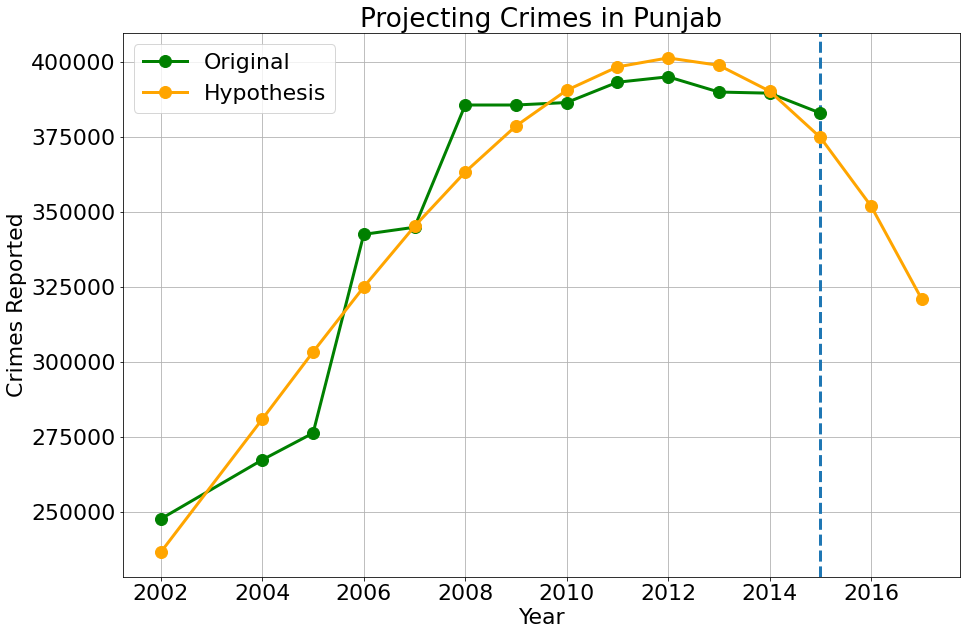

In [19]:
degree=3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,Y)

year=list(all_reported_yearwise['Year'])
year.append(2016)
year.append(2017)
ypred=polyreg.predict(pd.DataFrame(year))

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15,10))
plt.axvline(2015,linewidth = '3',linestyle = 'dashed')
plt.plot(all_reported_yearwise['Year'], all_reported_yearwise['Crime No'],label='Original', color='g',marker='o',linewidth=3.0,markersize=12)
plt.plot(year, ypred ,label='Hypothesis', color='orange',marker='o',linewidth=3.0,markersize=12)
plt.xlabel('Year')
plt.ylabel('Crimes Reported')
plt.title('Projecting Crimes in Punjab')
plt.legend()
plt.grid()
plt.show()